In [28]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [2]:
esg = pd.read_csv(r'/Users/harshsinhjethva/Desktop/DataScience_Python/Finance/company_esg_financial_dataset.csv')

In [3]:
# Check structure & summary

In [4]:
esg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CompanyID          11000 non-null  int64  
 1   CompanyName        11000 non-null  object 
 2   Industry           11000 non-null  object 
 3   Region             11000 non-null  object 
 4   Year               11000 non-null  int64  
 5   Revenue            11000 non-null  float64
 6   ProfitMargin       11000 non-null  float64
 7   MarketCap          11000 non-null  float64
 8   GrowthRate         10000 non-null  float64
 9   ESG_Overall        11000 non-null  float64
 10  ESG_Environmental  11000 non-null  float64
 11  ESG_Social         11000 non-null  float64
 12  ESG_Governance     11000 non-null  float64
 13  CarbonEmissions    11000 non-null  float64
 14  WaterUsage         11000 non-null  float64
 15  EnergyConsumption  11000 non-null  float64
dtypes: float64(11), int64(

In [5]:
esg.describe()

,CompanyID,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
count,11000.000000,11000.000000,11000.000000,11000.000000,11000.000000,10000.000000,11000.000000,11000.000000,11000.000000,11000.000000,1.100000e+04,1.100000e+04,1.100000e+04
mean,500.500000,2020.000000,4670.850591,10.900455,13380.622236,4.830370,54.615273,56.416991,55.660582,51.767655,1.271462e+06,5.600442e+05,1.165839e+07
std,288.688113,3.162421,9969.954369,8.758711,39922.870373,9.424787,15.893937,26.767233,23.356152,25.323370,5.067760e+06,1.565686e+06,5.095836e+07
min,1.000000,2015.000000,35.900000,-20.000000,1.800000,-36.000000,6.300000,0.000000,0.000000,0.000000,2.042200e+03,1.021100e+03,5.105500e+03
25%,250.750000,2017.000000,938.775000,5.300000,1098.525000,-1.325000,44.100000,34.700000,37.600000,30.775000,1.228530e+05,6.488467e+04,3.069161e+05
50%,500.500000,2020.000000,1902.300000,10.500000,3096.450000,4.900000,54.600000,55.600000,55.150000,52.100000,2.920734e+05,2.038805e+05,1.221745e+06
75%,750.250000,2023.000000,4342.625000,16.300000,9995.500000,11.000000,65.600000,79.000000,73.800000,73.000000,7.407311e+05,5.251880e+05,5.616437e+06
max,1000.000000,2025.000000,180810.400000,50.000000,865271.700000,38.000000,98.800000,100.000000,100.000000,100.000000,1.741047e+08,5.223142e+07,1.741047e+09


In [6]:
esg.head()

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
0,1,Company_1,Retail,Latin America,2015,459.2,6.0,337.5,NaN,57.0,60.7,33.5,76.8,35577.4,17788.7,71154.7
1,1,Company_1,Retail,Latin America,2016,473.8,4.6,366.6,3.2,56.7,58.9,32.8,78.5,37314.7,18657.4,74629.4
2,1,Company_1,Retail,Latin America,2017,564.9,5.2,313.4,19.2,56.5,57.6,34.0,77.8,45006.4,22503.2,90012.9
3,1,Company_1,Retail,Latin America,2018,558.4,4.3,283.0,-1.1,58.0,62.3,33.4,78.3,42650.1,21325.1,85300.2
4,1,Company_1,Retail,Latin America,2019,554.5,4.9,538.1,-0.7,56.6,63.7,30.0,76.1,41799.4,20899.7,83598.8


In [7]:
esg.columns

Index(['CompanyID', 'CompanyName', 'Industry', 'Region', 'Year', 'Revenue',
       'ProfitMargin', 'MarketCap', 'GrowthRate', 'ESG_Overall',
       'ESG_Environmental', 'ESG_Social', 'ESG_Governance', 'CarbonEmissions',
       'WaterUsage', 'EnergyConsumption'],
      dtype='object')

In [8]:
esg.duplicated().sum()

np.int64(0)

In [9]:
esg.isnull().sum()

CompanyID               0
CompanyName             0
Industry                0
Region                  0
Year                    0
Revenue                 0
ProfitMargin            0
MarketCap               0
GrowthRate           1000
ESG_Overall             0
ESG_Environmental       0
ESG_Social              0
ESG_Governance          0
CarbonEmissions         0
WaterUsage              0
EnergyConsumption       0
dtype: int64

In [10]:
# esg = esg.dropna(subset=['GrowthRate'])
# esg['GrowthRate'] = esg['GrowthRate'].fillna(esg['GrowthRate'].mean())
# esg['GrowthRate'] = esg['GrowthRate'].fillna(esg['GrowthRate'].median())
esg['GrowthRate'] = esg['GrowthRate'].fillna(0)
# esg['GrowthRate'] = esg.groupby(['CompanyID'])['GrowthRate'].transform(lambda x: x.fillna(x.mean()))

In [11]:
esg.isnull().sum()

CompanyID            0
CompanyName          0
Industry             0
Region               0
Year                 0
Revenue              0
ProfitMargin         0
MarketCap            0
GrowthRate           0
ESG_Overall          0
ESG_Environmental    0
ESG_Social           0
ESG_Governance       0
CarbonEmissions      0
WaterUsage           0
EnergyConsumption    0
dtype: int64

In [12]:
# esg['Year'] = esg['Year'].astype(int)
# esg

<Axes: xlabel='Revenue', ylabel='Count'>

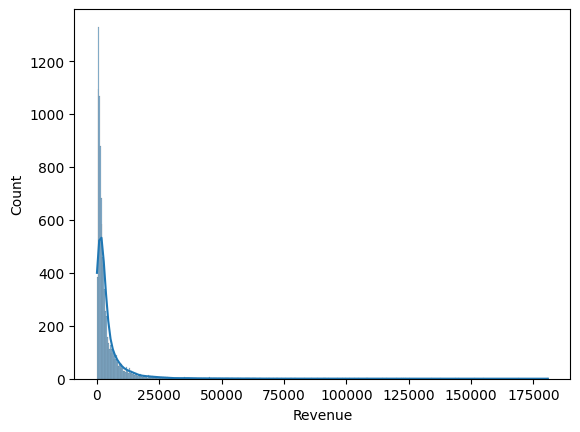

In [13]:
sns.histplot(esg['Revenue'], kde=True)

<Axes: xlabel='ProfitMargin'>

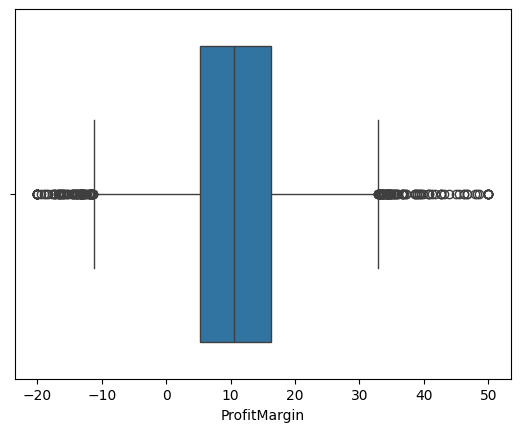

In [14]:
sns.boxplot(x=esg['ProfitMargin'])

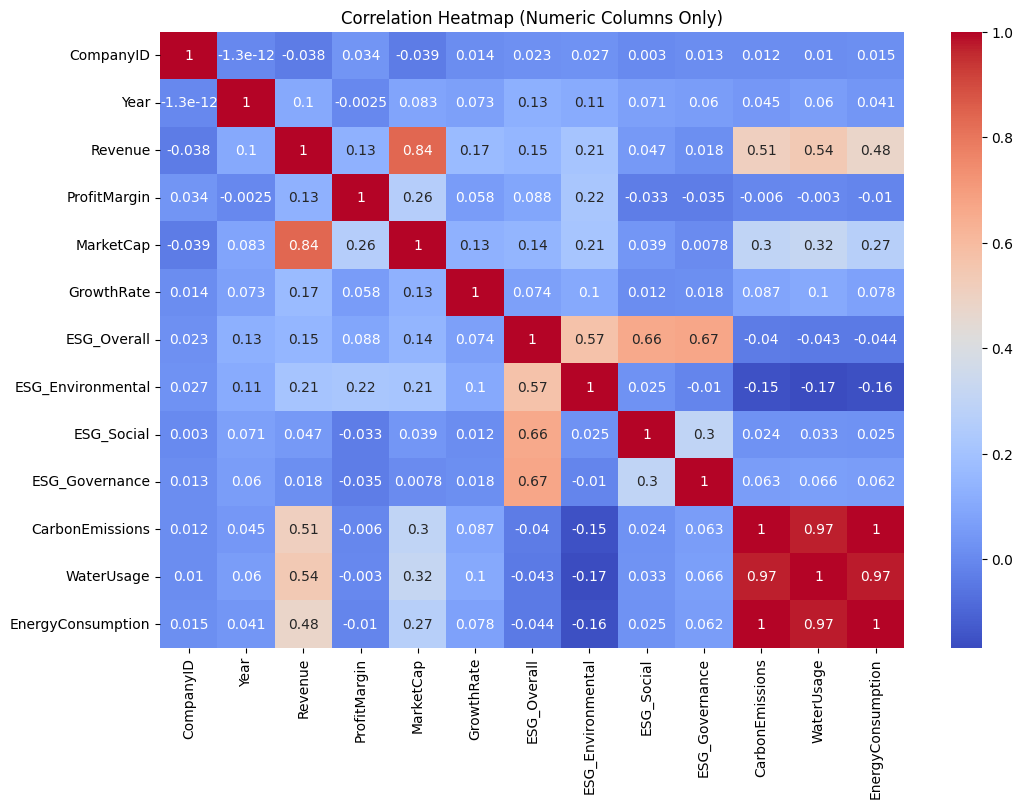

In [15]:
numeric_esg = esg.select_dtypes(include='number')

plt.figure(figsize=(12, 8))
sns.heatmap(numeric_esg.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Numeric Columns Only)')
plt.show()

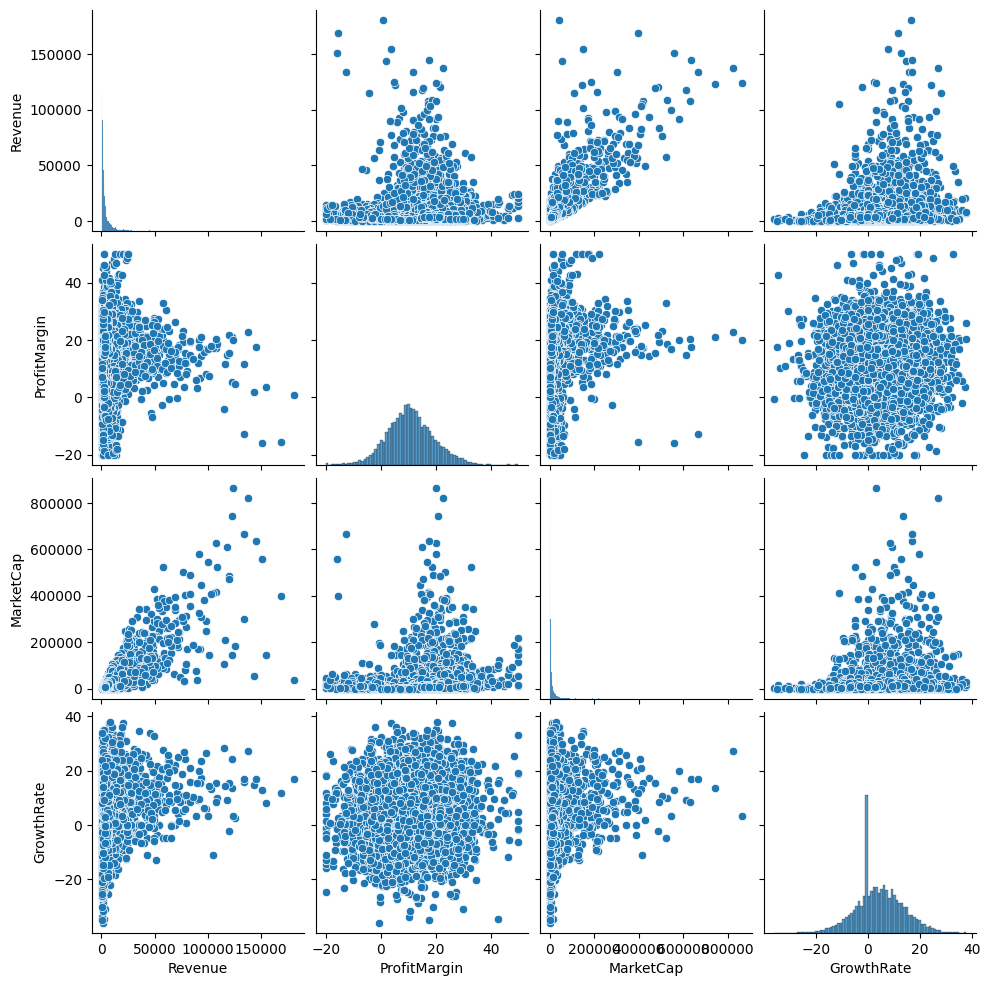

In [18]:
sns.pairplot(esg[['Revenue', 'ProfitMargin', 'MarketCap', 'GrowthRate']])

<Axes: xlabel='Year'>

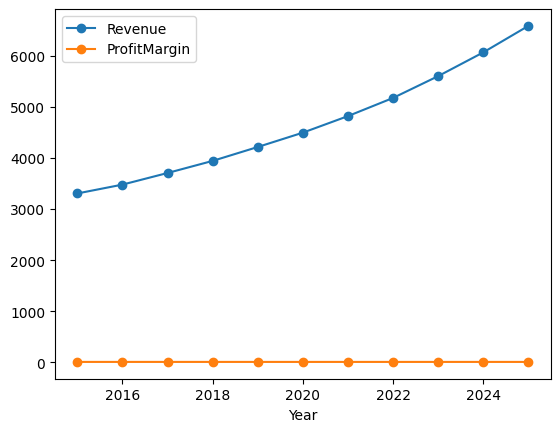

In [19]:
esg.groupby('Year')[['Revenue', 'ProfitMargin']].mean().plot(marker='o')

<Axes: xlabel='Industry'>

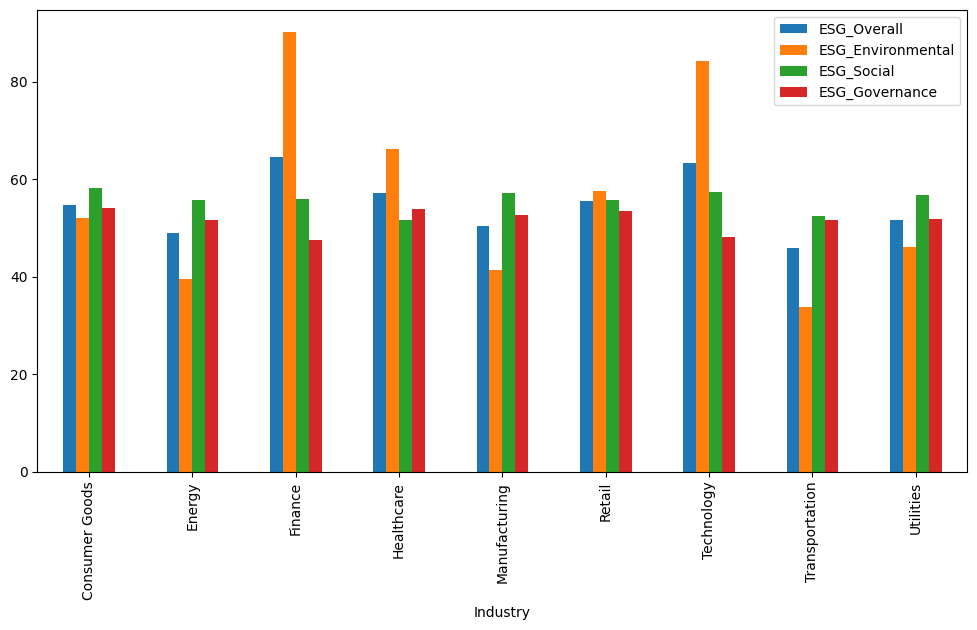

In [20]:
esg.groupby('Industry')[['ESG_Overall', 'ESG_Environmental', 'ESG_Social', 'ESG_Governance']].mean().plot(kind='bar', figsize=(12,6))

<Axes: ylabel='Region'>

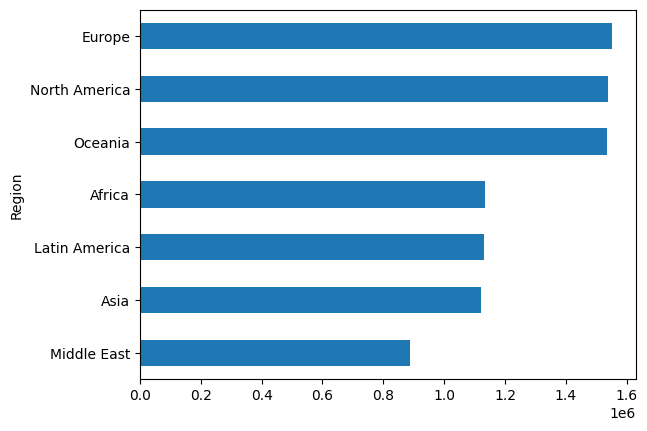

In [24]:
esg.groupby('Region')['CarbonEmissions'].mean().sort_values().plot(kind='barh')

<Axes: xlabel='ESG_Overall', ylabel='ProfitMargin'>

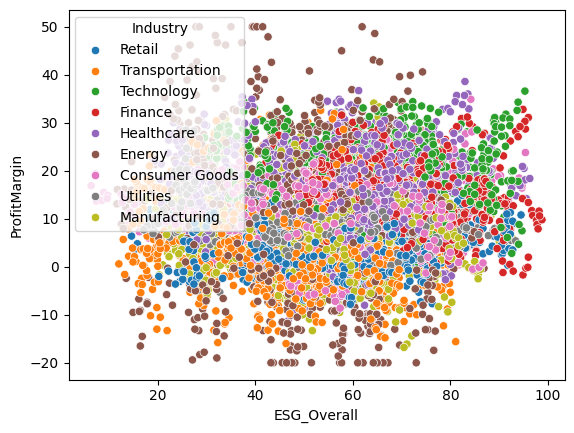

In [25]:
sns.scatterplot(x='ESG_Overall', y='ProfitMargin', hue='Industry', data=esg)

In [26]:
esg.sort_values(by='CarbonEmissions', ascending=False).head(10)

,CompanyID,CompanyName,Industry,Region,Year,Revenue,ProfitMargin,MarketCap,GrowthRate,ESG_Overall,ESG_Environmental,ESG_Social,ESG_Governance,CarbonEmissions,WaterUsage,EnergyConsumption
8348,759,Company_759,Energy,Oceania,2025,168988.9,-15.4,398218.7,11.8,57.9,24.2,67.0,82.4,174104721.4,52231416.4,1.741047e+09
8347,759,Company_759,Energy,Oceania,2024,151162.4,-16.0,559625.3,12.7,57.0,23.1,67.2,80.8,156960283.7,47088085.1,1.569603e+09
8346,759,Company_759,Energy,Oceania,2023,134141.9,-12.8,667399.7,17.0,58.1,26.4,65.7,82.1,136181429.6,40854428.9,1.361814e+09
8345,759,Company_759,Energy,Oceania,2022,114683.1,-4.2,107708.0,28.2,59.8,26.7,70.6,82.3,116218891.1,34865667.3,1.162189e+09
7105,646,Company_646,Energy,Europe,2025,134253.3,11.6,300465.1,15.7,84.6,56.3,100.0,97.6,108229578.1,32468873.4,1.082296e+09
5972,543,Company_543,Energy,North America,2025,93522.7,20.9,309026.1,23.5,50.5,17.2,59.4,75.0,100959805.2,30287941.6,1.009598e+09
7104,646,Company_646,Energy,Europe,2024,116015.7,11.6,210231.9,14.4,85.1,56.2,100.0,99.2,93589580.8,28076874.2,9.358958e+08
8344,759,Company_759,Energy,Oceania,2021,89482.7,3.4,36947.9,15.4,59.8,25.4,69.7,84.5,91499671.4,27449901.4,9.149967e+08
7103,646,Company_646,Energy,Europe,2023,101403.9,7.3,147180.2,14.4,84.9,54.6,100.0,100.0,82947547.4,24884264.2,8.294755e+08
5971,543,Company_543,Energy,North America,2024,75744.5,21.5,306993.4,18.8,49.7,17.7,57.6,73.9,81526510.3,24457953.1,8.152651e+08


In [29]:

X = esg[['Revenue', 'ProfitMargin', 'MarketCap', 'ESG_Overall']]
y = esg['GrowthRate'].fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
print("Model Score:", model.score(X_test, y_test))

Model Score: 0.03451735662296351
